# Solar Orbiter Meeting Oct 23 - 25, 2023

# SPICE data analysis tutorial talk
## Tania Varesano, CU Boulder / SWRI 
tania.varesano@colorado.edu

In [7]:
from IPython.display import Image

## But what is SPICE on Solar Orbiter ?

<div>
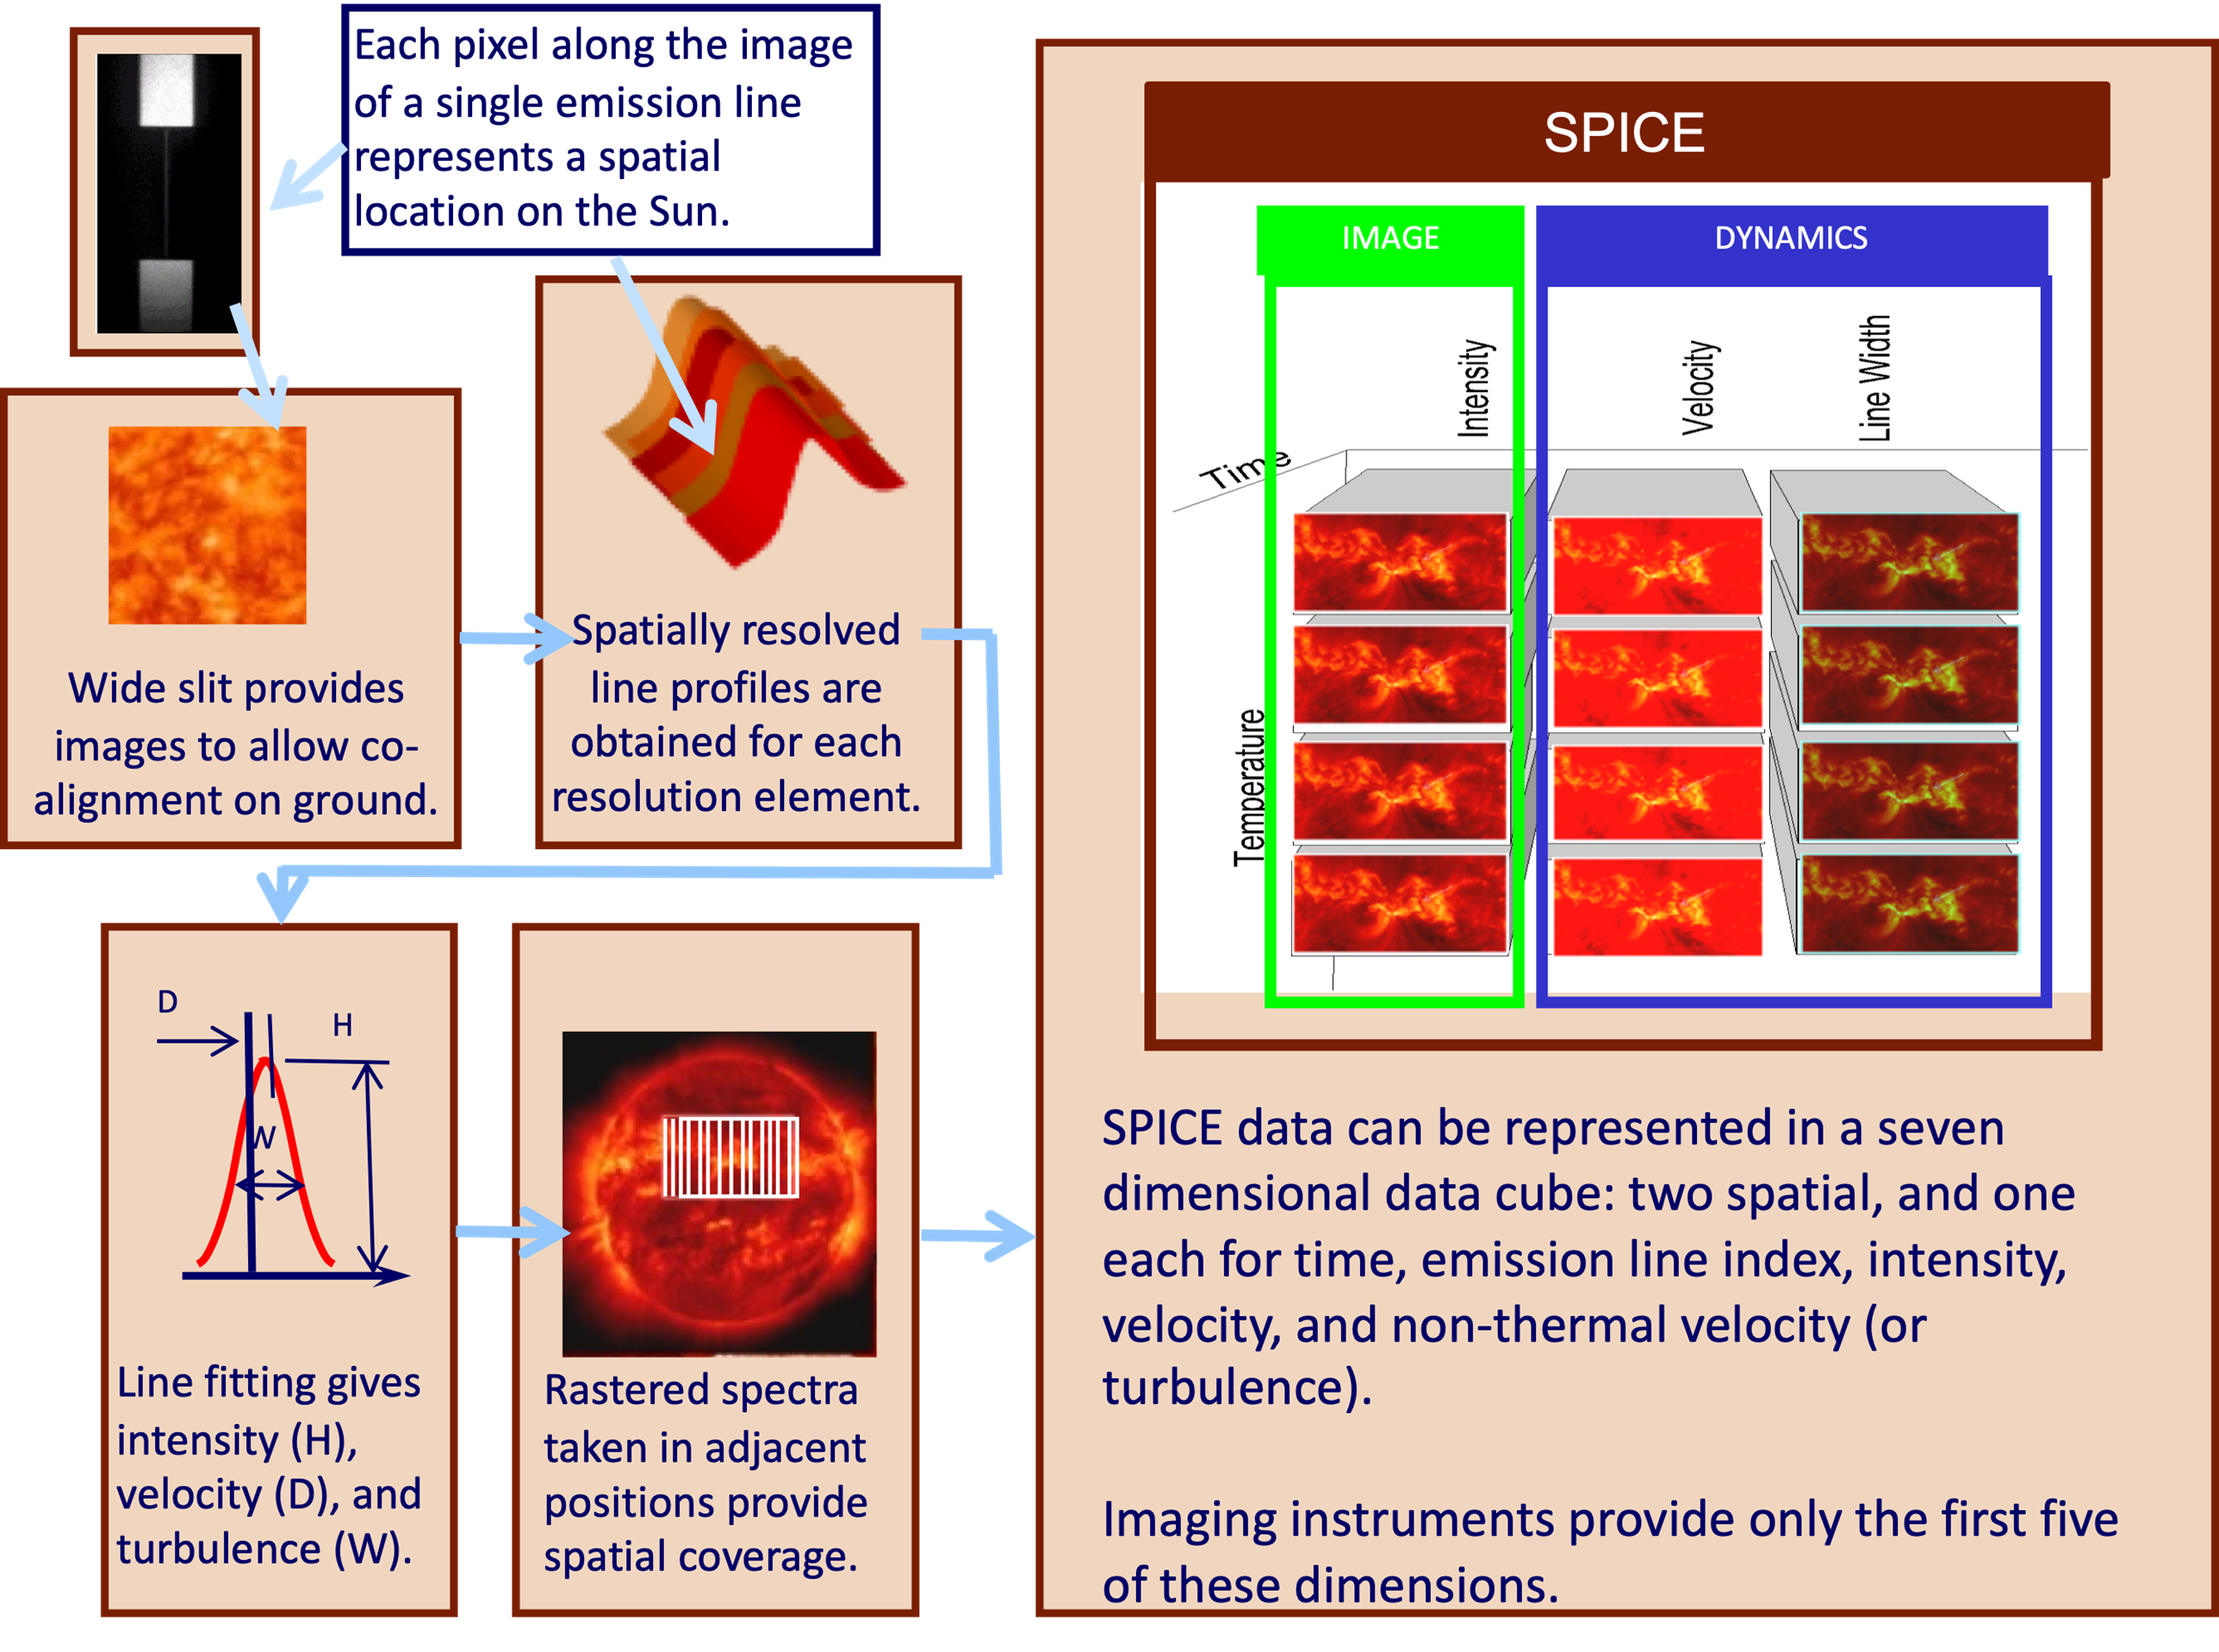
</div>

# Example of a raster 

* 2D at first sight, but contains much more!
* Each file (n-ras) contains several data cubes, all with the same spatial information but at different wavelengths

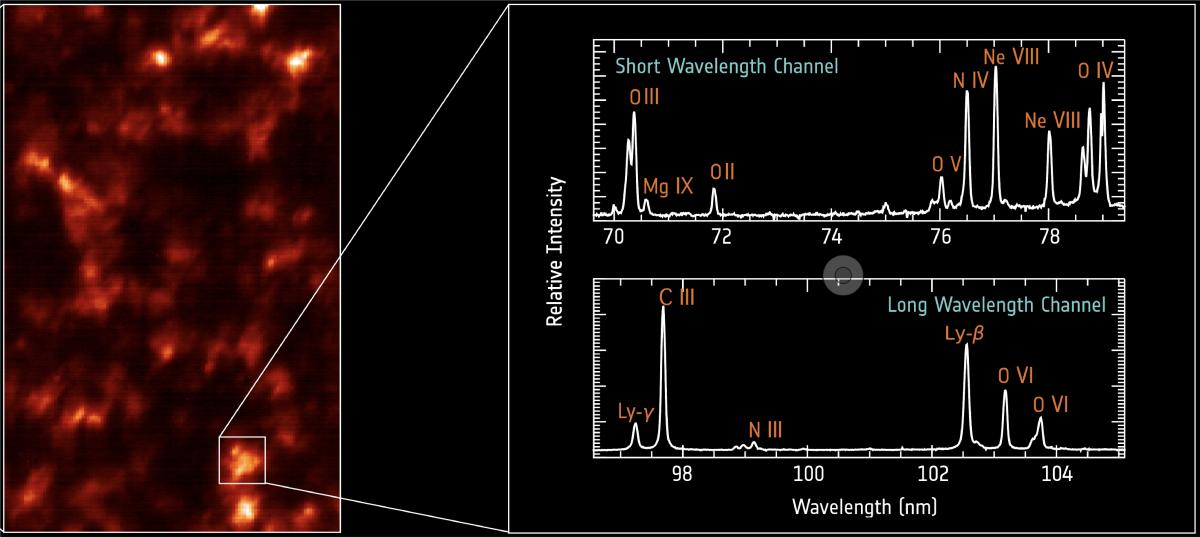

In [3]:
# Import some necessary packages 

import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from sunraster.instr.spice import read_spice_l2_fits
import os
import warnings 
warnings.filterwarnings("ignore")
plt.rcParams['image.origin'] = 'lower'
import astropy.units as u

In [10]:
# Get a file (or files!) from the solar orbiter archive
import sunpy_soar
from sunpy.net import Fido

from sunpy.net.attrs import Instrument, Level, Time
import sunpy.net.attrs as a

# Create search attributes
instrument = Instrument('SPICE')
time = Time('2022-08-21', '2022-08-23')
level = Level(2)
# n-ras: a raster scan with one of the narrow slits (2", 4" or 6")
product = a.soar.Product('spice-n-ras')
# Do search
result = Fido.search(instrument, time, level, product)
print(result)

Results from 1 Provider:

3 Results from the SOARClient:

Instrument Data product Level ...         End time        Filesize
                              ...                          Mbyte  
---------- ------------ ----- ... ----------------------- --------
     SPICE  spice-n-ras    L2 ... 2022-08-21 06:48:19.479  188.654
     SPICE  spice-n-ras    L2 ... 2022-08-21 18:48:19.802  188.654
     SPICE  spice-n-ras    L2 ... 2022-08-22 06:48:19.527  188.654




In [11]:
# Download the first file and print the location of the downloaded file
file = Fido.fetch(result[0][2])
print(file)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['C:\\Users\\tania\\sunpy\\data\\solo_L2_spice-n-ras_20220822T033521_V04_134218246-000.fits']


In [4]:
file = 'C:\\Users\\tania\\sunpy\\data\\solo_L2_spice-n-ras_20220822T033521_V04_134218246-000.fits'

# Open the file!

In [5]:
exposure = read_spice_l2_fits(os.path.join(file), memmap=False)

#What lines do we have?
keys=list(exposure.keys())
print(keys)

# Get the info for one line
print('\n\nData for window Ne VIII 770 :\n\n',exposure['Ne VIII 770 (Merged)'])

# for more complete diagnostic, open file with astropy.fits :
#hdulist = fits.open(spice_files[0])
#hdulist.info()
#hdulist[0].header

['O III 703 / Mg IX 706 (Merged)', 'O II 718 - Peak (spectral bin 2)', 'S IV 750/ Mg IX (spectral bin 2)', 'Ne VIII 770 (Merged)', 'S V 786 / O IV 787 (Merged)', 'Ly-gamma-CIII group (Merged)', 'N III 991 (Merged)', 'O VI 1032 (Merged)']


Data for window Ne VIII 770 :

 SpectrogramCube
---------------
Time Period: ['2022-08-22 03:35:51.911' '2022-08-22 06:47:49.212']
Instrument axes: ['raster scan' 'spectral' 'slit' 'slit step']
Pixel dimensions: [  1  40 834 192] pix
Longitude range: [-558.41528544  262.61269535] arcsec
Latitude range: [-543.50522362  418.19439476] arcsec
Spectral range: [7.66710207e-08 7.74316533e-08] m
Data unit: adu


In [6]:
#Take a quick look at the data
raster = exposure[keys[3]]  #take a look at the Ne VIII 770
print('Shape of the raster (spectral, latitude, longitude) : ',raster[0,:,:,:].data.shape)

Shape of the raster (spectral, latitude, longitude) (40, 834, 192)


### Plot the Ne VIII 770 A raster

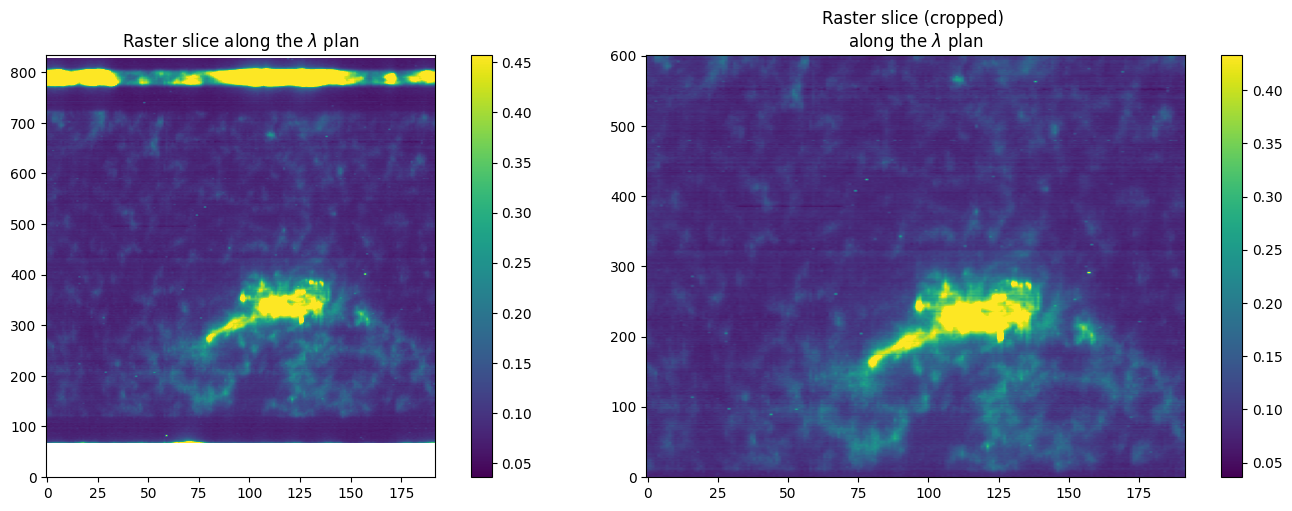

In [18]:
plt.figure(figsize= [15,5], tight_layout=True)
plt.subplot(1,2,1)

#take a spectral slice
plt.imshow(raster[0,15,:,:].data, vmax=np.nanquantile(raster[0,19,:,:].data, 0.9), aspect=1/4)
plt.colorbar()
plt.title('Raster slice along the $\lambda$ plan')

#Crop the edges!
plt.subplot(1,2,2)
plt.imshow(raster[0,15,110:711,:].data, vmax=np.nanquantile(raster[0,19,110:750,:].data, 0.9), aspect=1/4)
plt.colorbar()
plt.title('Raster slice (cropped) \nalong the $\lambda$ plan')
plt.show()

### Let's define a new variable for the "clean" data cube and convert to mW/sr/m2/A

In [ ]:
data_cube = (raster[0,:,110:750,:].data*(u.W/u.m**2/u.sr/u.nm)).to(u.mW/u.m**2/u.sr/u.Angstrom)
print(data_cube.shape

### How about... 1 pixel?
Get the wavelengths over which the window has been recorded

In [8]:
wavelengths = raster.spectral_axis.to(u.Angstrom)
wavelengths

[766.710207 766.905241 767.100275 767.295309 767.490343 767.685377
 767.880411 768.075445 768.270479 768.465513 768.660547 768.855581
 769.050615 769.245649 769.440683 769.635717 769.830751 770.025785
 770.220819 770.415853 770.610887 770.805921 771.000955 771.195989
 771.391023 771.586057 771.781091 771.976125 772.171159 772.366193
 772.561227 772.756261 772.951295 773.146329 773.341363 773.536397
 773.731431 773.926465 774.121499 774.316533] Angstrom


Text(0, 0.5, 'Intensity (mW/m2/sr/A)')

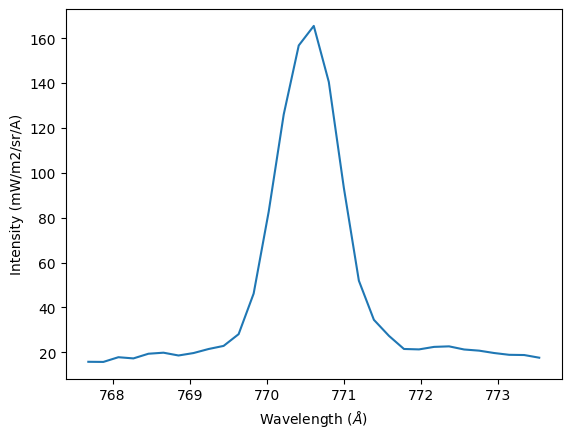

In [22]:
plt.plot(wavelengths, data_cube[:,250,100])
plt.xlabel('Wavelength ($\AA$)'), plt.ylabel('Intensity (mW/m2/sr/A)'), plt.title('Spectrum inside one pixel')

## Plot with WCS coordinates

In [105]:
%matplotlib notebook

In [111]:
raster.wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'WAVE'  'TIME'  
CRVAL : -0.041083620536666664  -0.01740430711763889  7.705133700000001e-08  5788.65029144  
CRPIX : 96.5  417.5  20.5  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 0.997945545148  0.0175866237859  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : -0.233398346866  0.997945545148  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : -60.3000030518  0.0  0.0  1.0  
CDELT : 0.0011111111111111111  0.00030500000000000004  1.9503400000000002e-11  1.0  
NAXIS : 192  834  40  1

In [116]:
raster.meta.original_header

XTENSION= 'IMAGE   '           / Written by IDL:  Wed Jan 18 18:12:31 2023      
BITPIX  =                  -32 / Real*4 (floating point)                        
NAXIS   =                    4 / Number of dimensions                           
NAXIS1  =                  192 / Number of slit positions (x)                   
NAXIS2  =                  834 / Number of pixels along slit (y)                
NAXIS3  =                   40 / Number of pixels in dispersion dimension       
NAXIS4  =                    1 / Number of exposures per slit position (time)   
PCOUNT  =                    0 /  number of random group parameters             
GCOUNT  =                    1 /  number of random groups                       
DATE    = '2023-01-18T18:12:31' / Date and time of FITS file creation           
                                                                                
EXTNAME = 'Ne VIII 770 (Merged)' / Extension name                               
FILENAME= 'solo_L2_spice-n-r

<IPython.core.display.Javascript object>


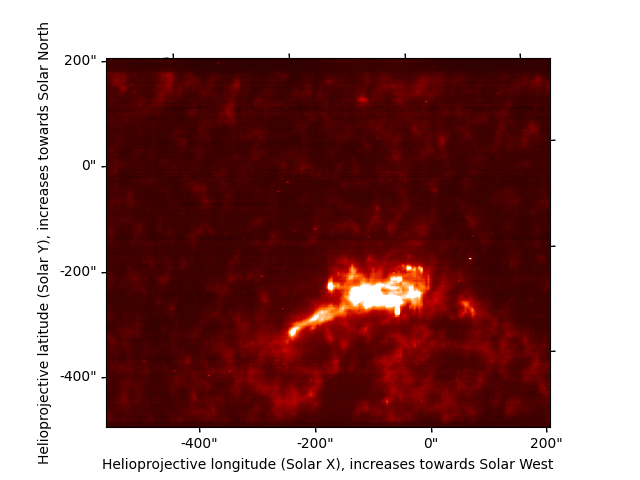

In [113]:
plt.figure()
plt.subplot(111, projection=wcs.celestial, slices = ('x', 'y'))
plt.imshow((data), cmap='viridis',vmin=0, vmax=0.5, aspect = 1/4)
plt.show()

In [12]:
from spice_uncertainties import spice_error
from astropy.io import fits

In [34]:
print(exposure.keys())
key = 'Ne VIII 770(Merged)'
cube = data_cube

cube = np.nan_to_num(cube) 

#Computing uncertainties
with fits.open(file) as hdulist:  # specify file name here
    hdu = hdulist[3];               # specify HDU index here
    av_constant_noise_level, sigma = spice_error(hdu, verbose=True)
    sigma = sigma['Total'][0,:,110:750,:].value/10
    
waves = wavelengths

dict_keys(['O III 703 / Mg IX 706 (Merged)', 'O II 718 - Peak (spectral bin 2)', 'S IV 750/ Mg IX (spectral bin 2)', 'Ne VIII 770 (Merged)', 'S V 786 / O IV 787 (Merged)', 'Ly-gamma-CIII group (Merged)', 'N III 991 (Merged)', 'O VI 1032 (Merged)'])
W / (m2 nm sr)
Getting observation parameters from Ne VIII 770 (Merged)

Slit: 4.0 arcsec
Bin: (2, 1)
Exposure time: 60.0 s
Window width: 40.0 pix
Average wavelength: 77.051337 nm
RADCAL: 2482.40730148 ct m2 nm sr / W
        


In [42]:
from specutils.fitting import fit_lines
from specutils.spectra import Spectrum1D
from astropy.modeling import models, fitting
from specutils.fitting import estimate_line_parameters
from astropy.nddata import StdDevUncertainty
import matplotlib as mlt

In [36]:
import tqdm
[nx, ny] = cube.shape[1:3]
[wvl1, wvl2] = [None, None]
dopp1= 770

nbrIterConv = np.zeros([nx,ny])
rss, rss1, rss2, rss3 = np.zeros([nx,ny]), np.zeros([nx,ny]), np.zeros([nx,ny]), np.zeros([nx,ny])
amps1, cen1, err1, sig1 = np.zeros([nx,ny]), np.zeros([nx,ny]), np.zeros([nx,ny]), np.zeros([nx,ny])


for i in tqdm.tqdm(range(0,nx)):
    for j in range(0,ny):
        data = np.nan_to_num(cube[:, i, j]).to(u.mW/u.m**2/u.sr/u.Angstrom)*2*2.5 #burn in and spectral binning
        errs = np.nan_to_num(sigma[:, i, j])*1e3

        spec = Spectrum1D(flux = data, spectral_axis = waves,
                            uncertainty=StdDevUncertainty(errs))#, mask=mask)
    

        c_init = models.Const1D(amplitude = np.nanmean(data)/20, bounds={'amplitude':[np.min(data),np.max(data)]})
        g_init = estimate_line_parameters(spec, models.Gaussian1D(bounds = {'stddev':[0.3,3], 'mean':[dopp1-1, dopp1+1]}))
        
        #try:    
        g_fit = fit_lines(spec, g_init +  c_init)
        y_fit = g_fit(waves)
        amps1[i][j] = (g_fit.amplitude_0.value/2)*np.sqrt(np.pi*2)*g_fit.stddev_0.value
        cen1[i][j] = dopp1  - g_fit.mean_0.value
        rss[i][j] = np.abs(np.mean(g_fit.meta['fit_info']['fvec']))
        nbrIterConv[i][j] = g_fit.meta['fit_info']['nfev']

100%|███████████████████████████████████████████████████████████████████████████████████████| 640/640 [34:52<00:00,  3.27s/it]


(<matplotlib.image.AxesImage at 0x2720f003a00>,
 <matplotlib.colorbar.Colorbar at 0x2720f05ec80>)

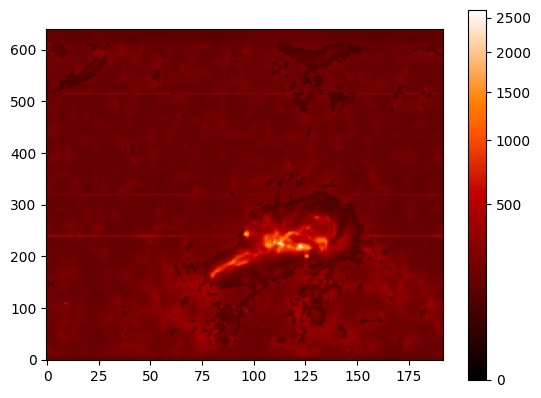

In [45]:
plt.imshow(amps1, aspect=1/4, cmap='gist_heat', norm=mlt.colors.PowerNorm(0.45, vmin=0)), plt.colorbar()

In [50]:
def substract_min_cube(cube):
        det_plane_min = np.nanmin(cube,axis=2)
        for i in range(0,cube.shape[2]): 
            cube[:,:,i] -= det_plane_min
        return cube

In [51]:
cube_sub = substract_min_cube(cube)

In [ ]:
import tqdm
[nx, ny] = cube_sub.shape[1:3]
[wvl1, wvl2] = [None, None]
dopp1= 770

nbrIterConv = np.zeros([nx,ny])
rss, rss1, rss2, rss3 = np.zeros([nx,ny]), np.zeros([nx,ny]), np.zeros([nx,ny]), np.zeros([nx,ny])
amps1, cen1, err1, sig1 = np.zeros([nx,ny]), np.zeros([nx,ny]), np.zeros([nx,ny]), np.zeros([nx,ny])


for i in tqdm.tqdm(range(0,nx)):
    for j in range(0,ny):
        data = np.nan_to_num(cube_sub[:, i, j]).to(u.mW/u.m**2/u.sr/u.Angstrom)*2*2.5 #burn in and spectral binning
        errs = np.nan_to_num(sigma[:, i, j])*1e3

        spec = Spectrum1D(flux = data, spectral_axis = waves,
                            uncertainty=StdDevUncertainty(errs))#, mask=mask)
    

        c_init = models.Const1D(amplitude = np.nanmean(data)/20, bounds={'amplitude':[np.min(data),np.max(data)]})
        g_init = estimate_line_parameters(spec, models.Gaussian1D(bounds = {'stddev':[0.3,3], 'mean':[dopp1-1, dopp1+1]}))
        
        #try:    
        g_fit = fit_lines(spec, g_init +  c_init)
        y_fit = g_fit(waves)
        amps1[i][j] = (g_fit.amplitude_0.value/2)*np.sqrt(np.pi*2)*g_fit.stddev_0.value
        cen1[i][j] = dopp1  - g_fit.mean_0.value
        rss[i][j] = np.abs(np.mean(g_fit.meta['fit_info']['fvec']))
        nbrIterConv[i][j] = g_fit.meta['fit_info']['nfev']

 21%|██████████████████▏                                                                    | 134/640 [08:04<30:10,  3.58s/it]